In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import LinearSVC,LinearSVR,SVR
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import accuracy_score,mean_squared_error,make_scorer
import pickle


In [2]:
data_breast_cancer = datasets.load_breast_cancer(as_frame=True) 


In [3]:
data_breast_cancer

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

In [4]:
data_iris = datasets.load_iris(as_frame=True)
data_iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [5]:
#Podzial na zbior uczacy i testujacy

In [6]:
X=data_breast_cancer.data[["mean area","mean smoothness"]]
y=data_breast_cancer.target
X_train_cancer,X_test_cancer,y_train_cancer,y_test_cancer= train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
svm_clf=LinearSVC(loss="hinge",random_state=42)
svm_clf.fit(X_train_cancer,y_train_cancer)

svm_clf_scaling=make_pipeline(StandardScaler(),
LinearSVC(C=1, random_state=42))

svm_clf_scaling.fit(X_train_cancer,y_train_cancer)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [8]:
#BEZ SKALOWANIA
svm_clf_pred_cancer_test = svm_clf.predict(X_test_cancer)
svm_clf_pred_cancer_train = svm_clf.predict(X_train_cancer)

acc_test = accuracy_score(y_test_cancer, svm_clf_pred_cancer_test)
acc_train = accuracy_score(y_train_cancer, svm_clf_pred_cancer_train)
#ZE SKALOWANIEM
svm_clf_pred_scal_cancer_test = svm_clf_scaling.predict(X_test_cancer)
svm_clf_pred_scal_cancer_train = svm_clf_scaling.predict(X_train_cancer)

acc_test_scal = accuracy_score(y_test_cancer, svm_clf_pred_scal_cancer_test)
acc_train_scal = accuracy_score(y_train_cancer, svm_clf_pred_scal_cancer_train)

print(acc_test,acc_train)
print(acc_test_scal,acc_train_scal)

cancer_acc=[acc_train,acc_test,acc_train_scal,acc_test_scal]
with open('bc_acc.pkl', 'wb') as f:
    pickle.dump(cancer_acc, f)

0.6228070175438597 0.6285714285714286
0.9298245614035088 0.8945054945054945


In [9]:
X=data_iris.data[["petal length (cm)","petal width (cm)"]]
y=(data_iris.target==2)
X_train_iris,X_test_iris,y_train_iris,y_test_iris= train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
svm_clf_iris=LinearSVC(C=1,loss="hinge",random_state=42)
svm_clf_iris.fit(X,y)

svm_clf_scaling_iris=make_pipeline(StandardScaler(),
LinearSVC(C=1, random_state=42))

svm_clf_scaling_iris.fit(X_train_iris,y_train_iris)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [11]:
#BEZ SKALOWANIA
svm_clf_pred_iris_test = svm_clf_iris.predict(X_test_iris)
svm_clf_pred_iris_train = svm_clf_iris.predict(X_train_iris)

acc_test=accuracy_score(y_test_iris,svm_clf_pred_iris_test)
acc_train=accuracy_score(y_train_iris,svm_clf_pred_iris_train)

#ZE SKALOWANIEM
svm_clf_pred_scal_iris_test = svm_clf_scaling_iris.predict(X_test_iris)
svm_clf_pred_scal_iris_train = svm_clf_scaling_iris.predict(X_train_iris)

acc_test_scal=accuracy_score(y_test_iris,svm_clf_pred_scal_iris_test)
acc_train_scal=accuracy_score(y_train_iris,svm_clf_pred_scal_iris_train)

In [12]:
print(acc_test,acc_train)
print(acc_test_scal,acc_train_scal)
iris_acc=[acc_train,acc_test,acc_train_scal,acc_test_scal]
with open('iris_acc.pkl', 'wb') as f:
    pickle.dump(iris_acc, f)

1.0 0.95
1.0 0.95


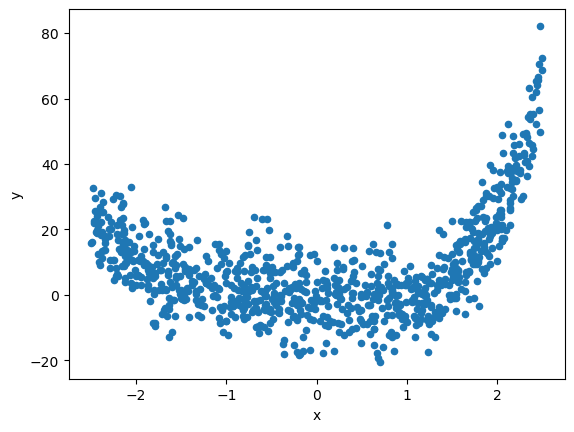

In [13]:
import numpy as np
import pandas as pd
size = 900
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4 
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')
X=df[['x']]
y=df['y']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
model = make_pipeline(
    PolynomialFeatures(degree=4,include_bias=False),  
    StandardScaler(),               
    LinearSVR()                     
)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE dla zbioru uczącego:", mse_train)
print("MSE dla zbioru testowego:", mse_test)

MSE dla zbioru uczącego: 60.522103849192604
MSE dla zbioru testowego: 64.10560066546597


In [16]:
model_poly_svr = make_pipeline(
    PolynomialFeatures(degree=4),  
    StandardScaler(),              
    SVR(kernel='poly')             
)

model_poly_svr.fit(X_train, y_train)

y_train_pred_poly_svr = model_poly_svr.predict(X_train)
y_test_pred_poly_svr = model_poly_svr.predict(X_test)

mse_train_poly_svr = mean_squared_error(y_train, y_train_pred_poly_svr)
mse_test_poly_svr = mean_squared_error(y_test, y_test_pred_poly_svr)

print("MSE dla zbioru uczącego (SVR z kernelem poly):", mse_train_poly_svr)
print("MSE dla zbioru testowego (SVR z kernelem poly):", mse_test_poly_svr)

MSE dla zbioru uczącego (SVR z kernelem poly): 65.26960631102965
MSE dla zbioru testowego (SVR z kernelem poly): 73.18948838870332


In [17]:
param_grid = {
    "svr__C": [0.1, 1, 10],      
    "svr__coef0": [0.1, 1, 10]   
}


scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(model_poly_svr, param_grid, scoring=scorer, n_jobs=-1)

grid_search.fit(X, y)

best_params = grid_search.best_params_

print("Najlepsze parametry:", best_params)

best_score = grid_search.best_score_
print("Najlepszy wynik (neg_mean_squared_error):", best_score)

Najlepsze parametry: {'svr__C': 0.1, 'svr__coef0': 10}
Najlepszy wynik (neg_mean_squared_error): -61.56987957825801


In [18]:
best_svr = SVR(kernel='poly', degree=4, C=best_params['svr__C'], coef0=best_params['svr__coef0'])

# Trenowanie modelu
best_svr.fit(X_train, y_train)

# Przewidywanie na zbiorze uczącym i testowym
y_train_pred_best = best_svr.predict(X_train)
y_test_pred_best = best_svr.predict(X_test)

# Obliczenie MSE dla zbioru uczącego i testowego
mse_train_best = mean_squared_error(y_train, y_train_pred_best)
mse_test_best = mean_squared_error(y_test, y_test_pred_best)

print("MSE dla zbioru uczącego (SVR z optymalnymi parametrami):", mse_train_best)
print("MSE dla zbioru testowego (SVR z optymalnymi parametrami):", mse_test_best)

MSE dla zbioru uczącego (SVR z optymalnymi parametrami): 60.53725081110964
MSE dla zbioru testowego (SVR z optymalnymi parametrami): 63.94459074989132


In [19]:
mse_list=[mse_train,mse_test,mse_train_best,mse_test_best]
with open("reg_mse.pkl",'wb') as f:
    pickle.dump(mse_list,f)
